<a id="table-of-contents"></a>
# 🗂️ Visualizations

- [⚙️ Setup](#setup)  
- [📊 Basic Visualizations](#basic-viz)  
  - [📊 Bar Chart](#bar-chart)  
  - [📈 Histogram](#histogram)  
  - [📉 Line Chart](#line-chart)  
  - [⚫ Scatter Plot](#scatter-plot)  
  - [🔥 Heatmap](#heatmap)  
- [🧱 Subplots](#subplots)  
- [💾 Save to Disk](#save-to-disk)  
  - [🖼️ Save to Image](#save-image)  
  - [📄 Save Plots to PDF](#save-pdf)  

___

<a id="setup"></a>
# ⚙️ Setup

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# %matplotlib notebook

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
df.dropna(inplace=True)
df.head(20)
df.shape

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE


(333, 7)

[Back to the top](#table-of-contents)
___

<a id="basic-viz"></a>
# 📊 Basic Visualizations


<a id="bar-chart"></a>
#### 📊 Bar Chart


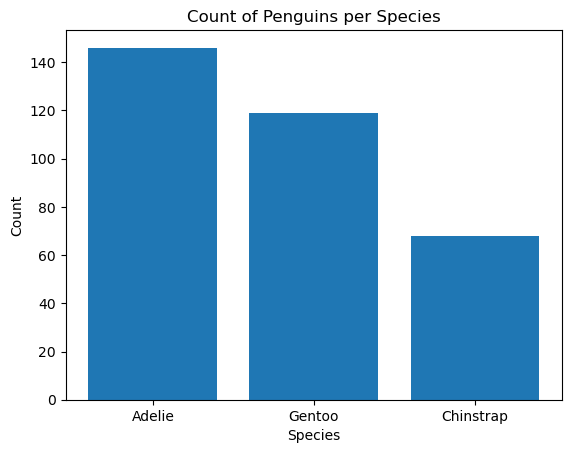

In [8]:
counts = df["species"].value_counts()
_ = plt.bar(counts.index, counts.values)
plt.title("Count of Penguins per Species");
plt.xlabel("Species");
plt.ylabel("Count");
plt.show();


<a id="histogram"></a>
#### 📈 Histogram


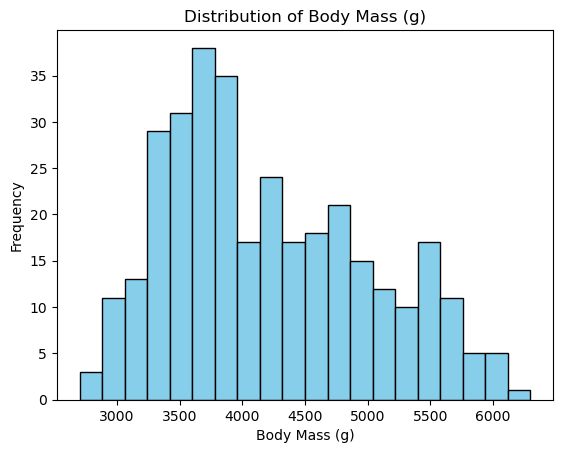

In [10]:
plt.hist(df["body_mass_g"], bins=20, color="skyblue", edgecolor="black");
plt.title("Distribution of Body Mass (g)");
plt.xlabel("Body Mass (g)");
plt.ylabel("Frequency");
plt.show();

<a id="line-chart"></a>
#### 📉 Line Chart


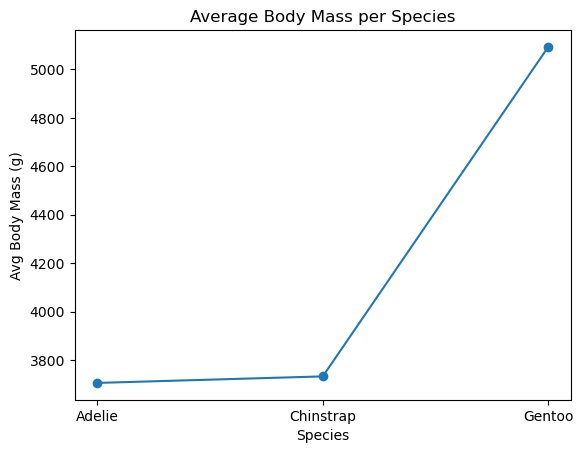

In [ ]:
avg = df.groupby("species")["body_mass_g"].mean()
plt.plot(avg.index, avg.values, marker='o');
plt.title("Average Body Mass per Species");
plt.xlabel("Species");
plt.ylabel("Avg Body Mass (g)");
plt.show();


<a id="scatter-plot"></a>
#### ⚫ Scatter Plot


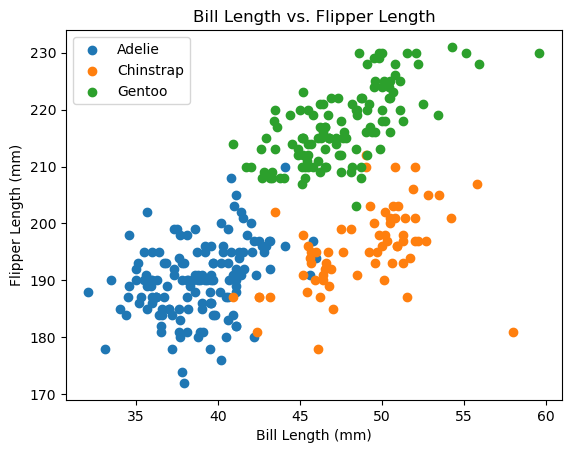

In [14]:
species = df["species"].unique()
for sp in species:
    subset = df[df["species"] == sp]
    plt.scatter(subset["bill_length_mm"], subset["flipper_length_mm"], label=sp);
plt.title("Bill Length vs. Flipper Length");
plt.xlabel("Bill Length (mm)");
plt.ylabel("Flipper Length (mm)");
plt.legend();
plt.show();


<a id="heatmap"></a>
#### 🔥 Heatmap


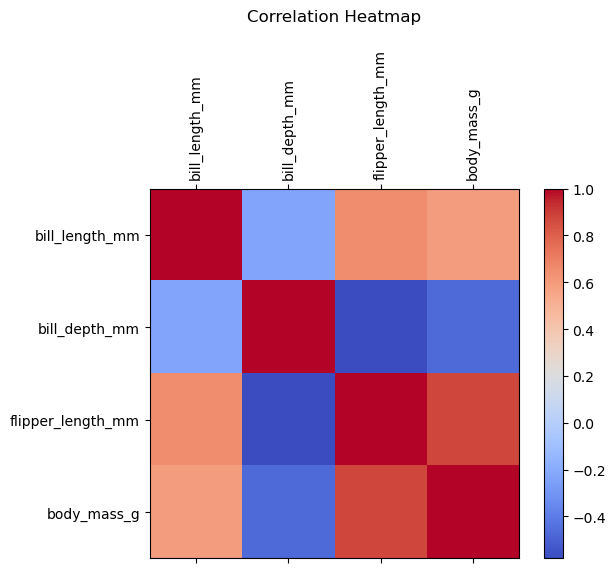

In [16]:
import numpy as np

corr = df.select_dtypes(include="number").corr()
fig, ax = plt.subplots();
cax = ax.matshow(corr, cmap="coolwarm");
fig.colorbar(cax);
ticks = np.arange(len(corr.columns));
plt.xticks(ticks, corr.columns, rotation=90);
plt.yticks(ticks, corr.columns);
plt.title("Correlation Heatmap", pad=20);
plt.show();


[Back to the top](#table-of-contents)
___

<a id="subplots"></a>
# 🧱 Subplots


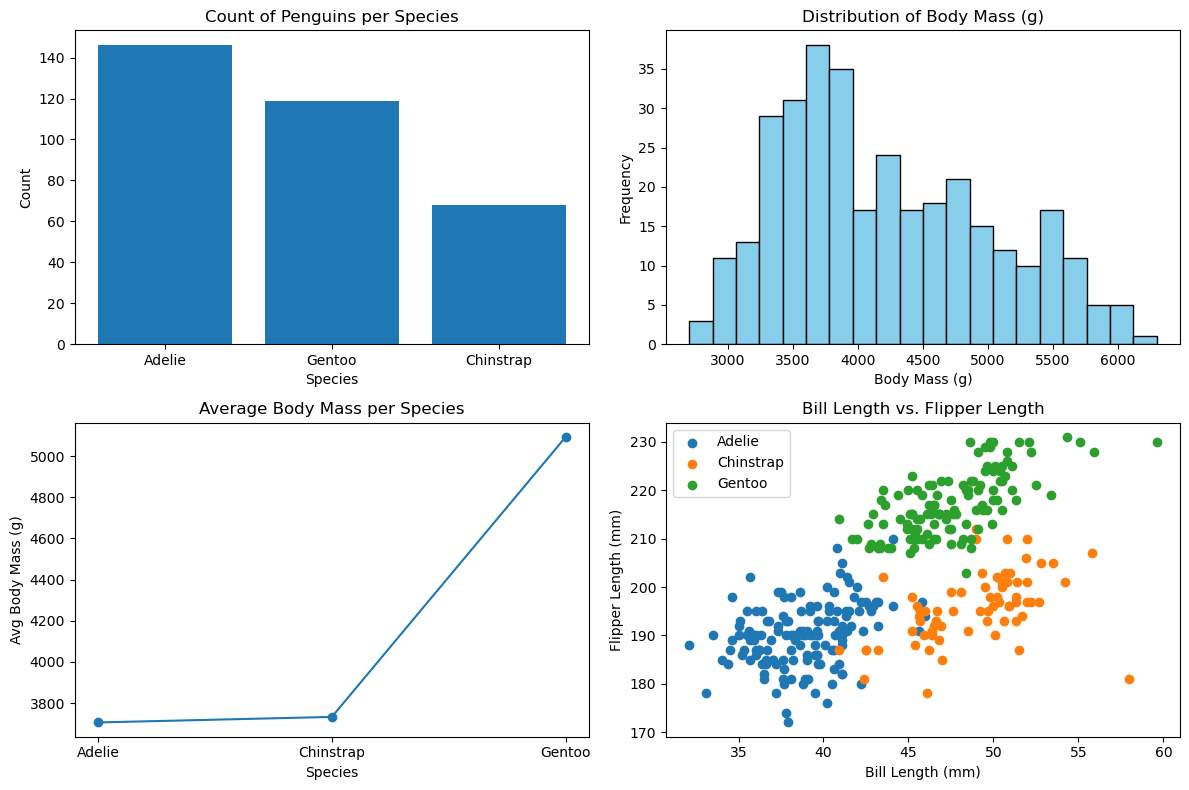

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
subplot_index = 0

def next_ax():
    global subplot_index
    plt.sca(axes[subplot_index])
    subplot_index += 1

# --- Paste starts here ---
# --- Plot 1 ---
next_ax()
counts = df["species"].value_counts()
_ = plt.bar(counts.index, counts.values)
plt.title("Count of Penguins per Species");
plt.xlabel("Species");
plt.ylabel("Count");

# --- Plot 2 ---
next_ax()
plt.hist(df["body_mass_g"], bins=20, color="skyblue", edgecolor="black");
plt.title("Distribution of Body Mass (g)");
plt.xlabel("Body Mass (g)");
plt.ylabel("Frequency");

# --- Plot 3 ---
next_ax()
avg = df.groupby("species")["body_mass_g"].mean()
plt.plot(avg.index, avg.values, marker='o');
plt.title("Average Body Mass per Species");
plt.xlabel("Species");
plt.ylabel("Avg Body Mass (g)");

# --- Plot 4 ---
next_ax()
species = df["species"].unique()
for sp in species:
    subset = df[df["species"] == sp]
    plt.scatter(subset["bill_length_mm"], subset["flipper_length_mm"], label=sp);
plt.title("Bill Length vs. Flipper Length");
plt.xlabel("Bill Length (mm)");
plt.ylabel("Flipper Length (mm)");
plt.legend();

# --- Paste ends here ---
plt.tight_layout();
plt.show();

[Back to the top](#table-of-contents)
___

<a id="save-to-disk"></a>
# 💾 Save to Disk


<a id="save-image"></a>
#### 🖼️ Save to Image


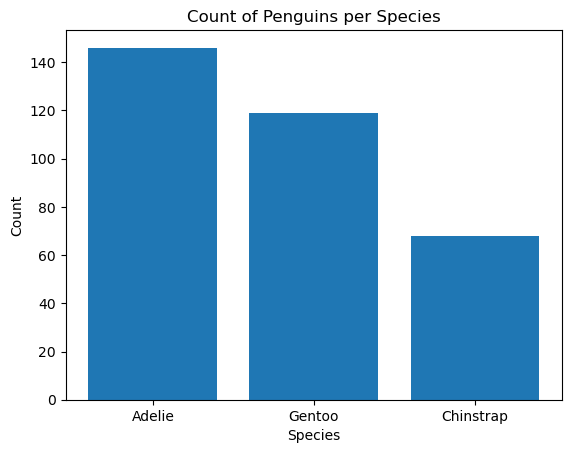

In [33]:
counts = df["species"].value_counts()
_ = plt.bar(counts.index, counts.values)
plt.title("Count of Penguins per Species");
plt.xlabel("Species");
plt.ylabel("Count");
plt.savefig('output.png'); # or output.pdf or output.png

<a id="save-pdf"></a>
#### 📄 Save Plots to PDF


In [47]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

rows, cols = 2, 3
plots_per_page = rows * cols

plots = [
    lambda: plt.bar(df["species"].value_counts().index, df["species"].value_counts().values),
    lambda: plt.hist(df["body_mass_g"], bins=20),
    lambda: plt.plot(df.groupby("species")["body_mass_g"].mean()),
    lambda: plt.scatter(df["bill_length_mm"], df["flipper_length_mm"]),
    lambda: plt.hist(df["flipper_length_mm"]),
    lambda: plt.boxplot(df["body_mass_g"]),
    lambda: plt.plot(df["bill_depth_mm"].rolling(5).mean()),
    lambda: plt.hist(df["body_mass_g"], bins=20),
]

with PdfPages("output.pdf") as pdf:
    for i in range(0, len(plots), plots_per_page):
        fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))

        # Ensure axes is always a list
        if plots_per_page == 1:
            axes = [axes]
        else:
            axes = axes.flatten()

        for j in range(plots_per_page):
            plot_idx = i + j
            if plot_idx >= len(plots):
                fig.delaxes(axes[j])
            else:
                plt.sca(axes[j])
                plots[plot_idx]();  # works fine

        plt.tight_layout()
        pdf.savefig(fig)
        plt.close(fig)


<BarContainer object of 3 artists>

(array([ 3., 11., 13., 29., 31., 38., 35., 17., 24., 17., 18., 21., 15.,
        12., 10., 17., 11.,  5.,  5.,  1.]),
 array([2700., 2880., 3060., 3240., 3420., 3600., 3780., 3960., 4140.,
        4320., 4500., 4680., 4860., 5040., 5220., 5400., 5580., 5760.,
        5940., 6120., 6300.]),
 <BarContainer object of 20 artists>)

(array([ 3., 20., 51., 77., 44., 15., 42., 38., 28., 15.]),
 array([172. , 177.9, 183.8, 189.7, 195.6, 201.5, 207.4, 213.3, 219.2,
        225.1, 231. ]),
 <BarContainer object of 10 artists>)

{'whiskers': [<matplotlib.lines.Line2D at 0x15d55c590>,
 'caps': [<matplotlib.lines.Line2D at 0x15d28d650>,
 'boxes': [<matplotlib.lines.Line2D at 0x15d55ff90>],
 'medians': [<matplotlib.lines.Line2D at 0x15d28f710>],
 'fliers': [<matplotlib.lines.Line2D at 0x15d28e990>],
 'means': []}

(array([ 3., 11., 13., 29., 31., 38., 35., 17., 24., 17., 18., 21., 15.,
        12., 10., 17., 11.,  5.,  5.,  1.]),
 array([2700., 2880., 3060., 3240., 3420., 3600., 3780., 3960., 4140.,
        4320., 4500., 4680., 4860., 5040., 5220., 5400., 5580., 5760.,
        5940., 6120., 6300.]),
 <BarContainer object of 20 artists>)

[Back to the top](#table-of-contents)
___